In [96]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils

import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot

import numpy as np
import scipy.io
from PIL import Image
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing
from IPython import display
import time

img_rows, img_cols, img_depth = 64, 64, 64

In [3]:
root_dir = 'c:/Users/caixiaod/Documents/IME/radar/infineon_radar/live_demo/dataset_withlabel/'
listing = os.listdir(root_dir)
maxval = 0.46
classes = {'none':0, 'left':1, 'right':2, 'click':3, 'wrist':4}

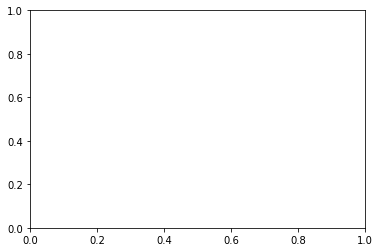

In [60]:
frames = []
labels = []
nongesture_count = 0

fig = plt.figure()
ax = fig.add_subplot(111)

for file in listing:
    file = root_dir + file
    data = scipy.io.loadmat(file)
    images = data['images']
    label = data['labels']
    num_frame = images.shape[0]
    
    rdm = np.zeros((64, 64))
    
    nonzero_idx = np.nonzero(label)
    nonzero_idx_beg = np.min(nonzero_idx)
    nonzero_idx_end = np.max(nonzero_idx)
    
    for i in range(nonzero_idx_beg, nonzero_idx_end):
        imgi = images[i].reshape(64, 64)
        rdm = np.maximum(rdm, imgi)
        gt = label[i]
        
    for i in range(nonzero_idx_end, num_frame):
        imgi = images[i].reshape(64, 64)
        rdm = np.maximum(rdm, imgi)
        frames.append(rdm)
        labels.append(gt)
#     ax.imshow(rdm[10:,:])
#     title = str(i) + '/' + str(num_frame) + ', label:' + str(gt)
#     plt.title(title)
#     display.clear_output(wait=True)
#     display.display(fig)
#     time.sleep(0.1)

In [63]:
num_samples = len(frames)
# frames_arr =np.array(frames)

In [65]:
X = np.array(frames)

In [86]:
labels = np.array(labels) - 1

In [87]:
batch_size = 4
nb_classes = 4
nb_epoch = 100
patch_size = 64

In [89]:
y = np_utils.to_categorical(labels, nb_classes)

nb_filters = [32, 32]
nb_pool = [2, 2]
nb_conv = [5, 5]

X = X.astype('float32')
X -= np.mean(X)
X /= np.max(X)

X = X.reshape(num_samples, 64, 64, 1)

In [102]:
model = Sequential()
print(nb_filters[0], 'filters')
print('input shape', img_rows, 'rows', img_cols, 'cols', patch_size, 'patchsize')

model.add(Conv2D(16,
                 (5, 5),
                 input_shape=(img_rows, img_cols, 1),
                 activation='relu',
                 padding='SAME'))

model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(16,
                 (5, 5),
                 input_shape=(img_rows, img_cols, 1),
                 activation='relu',
                 padding='SAME'))

model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(16,
                 (3, 3),
                 input_shape=(img_rows, img_cols, 1),
                 activation='relu',
                 padding='SAME'))

model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(16,
                 (3, 3),
                 input_shape=(img_rows, img_cols, 1),
                 activation='relu',
                 padding='SAME'))

model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(84, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, kernel_initializer='normal'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['mse', 'accuracy'])

model.summary()

32 filters
input shape 64 rows 64 cols 64 patchsize
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 16)        416       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 16)        6416      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)      

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

hist = model.fit(
X_train,
y_train,
validation_data=(X_val, y_val),
batch_size=batch_size,
epochs=nb_epoch,
shuffle=True
)

Train on 78157 samples, validate on 19540 samples
Epoch 1/100
78157/78157 [==============================] - 184s 2ms/step - loss: 1.2871 - mean_squared_error: 0.1766 - acc: 0.3798 - val_loss: 1.2775 - val_mean_squared_error: 0.1760 - val_acc: 0.3830
Epoch 2/100
76460/78157 [============================>.] - ETA: 3s - loss: 1.2898 - mean_squared_error: 0.1766 - acc: 0.3800

In [ ]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

In [ ]:
plt.plot(train_loss); plt.title('train loss')
plt.plot(val_loss); plt.title('val loss')
plt.legend(['train loss', 'val_loss'])

In [ ]:
plt.plot(train_acc); plt.title('train acc')
plt.plot(val_acc); plt.title('val acc')
plt.legend(['train loss', 'val loss'])
plt.grid(True)
plt.ylim(0,1)

In [13]:
X.shape

(8661, 64, 64, 64, 1)

In [13]:
from keras import backend as K
K.clear_session()

In [14]:
np.save('X.npy', X)

In [15]:
np.save('y.npy', y)